In [20]:
import tensorflow as tf
from tensorflow.keras import layers, models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
csv_file = r"A:\GBC SEMESTERS\GBC Semester 2\Deep Learning 2\week 1\Data\Data\emnist.csv"
image_dir = r"A:\GBC SEMESTERS\GBC Semester 2\Deep Learning 2\week 1\Data\Data"

In [22]:
print(tf.config.list_physical_devices('GPU'))

[]


In [23]:
df = pd.read_csv(csv_file)

In [24]:
df.head()

,img_name,label
0,36/char_1.jpeg,36
1,43/char_2.jpeg,43
2,46/char_10.jpeg,46
3,43/char_11.jpeg,43
4,13/char_13.jpeg,13


In [25]:
df['label'] = df['label'].astype(str)

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1
)

In [26]:
train_generator = datagen.flow_from_dataframe(
    dataframe=df,
    directory=image_dir,
    x_col='img_name',
    y_col='label',
    subset='training',
    batch_size=32,
    seed=42,
    shuffle=True,
    class_mode='sparse',
    target_size=(28,28),
    color_mode='grayscale'
)

validation_generator = datagen.flow_from_dataframe(
    dataframe=df,
    directory=image_dir,
    x_col='img_name',
    y_col='label',
    subset='validation',
    batch_size=32,
    seed=42,
    shuffle=True,
    class_mode='sparse',
    target_size=(28,28),
    color_mode='grayscale'
)

Found 17760 validated image filenames belonging to 37 classes.
Found 4440 validated image filenames belonging to 37 classes.


In [27]:
# Defining CNN for MNIST

def create_emnist_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(37, activation='softmax')
    ])
    return model

In [28]:

with tf.device('/GPU:0'):
    emnist_model = create_emnist_model()
    emnist_model.compile(optimizer='adam',
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

c:\Users\patel\.conda\envs\Deep-Learning\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
history = emnist_model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
)

Epoch 1/50


c:\Users\patel\.conda\envs\Deep-Learning\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


555/555 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.2937 - loss: 2.5645 - val_accuracy: 0.6791 - val_loss: 1.0618
Epoch 2/50
555/555 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.7288 - loss: 0.8852 - val_accuracy: 0.7707 - val_loss: 0.7543
Epoch 3/50
555/555 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.8010 - loss: 0.6500 - val_accuracy: 0.8144 - val_loss: 0.6226
Epoch 4/50
555/555 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.8209 - loss: 0.5670 - val_accuracy: 0.8383 - val_loss: 0.5205
Epoch 5/50
555/555 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.8469 - loss: 0.4827 - val_accuracy: 0.8401 - val_loss: 0.5104
Epoch 6/50
555/555 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.8524 - loss: 0.4376 - val_accuracy: 0.8579 - val_loss: 0.4739
Epoch 7/50
555/555 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.8601 - loss: 0.4324 - val_accuracy: 0.8390 - val_loss: 0.5141
Epoch 8/50
555/555 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.8689 - loss: 0.4018 - val_accuracy

In [30]:
test_loss, test_acc = emnist_model.evaluate(validation_generator, steps=128)
print(f'Test accuracy is: {test_acc:.4f}')

128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8898 - loss: 0.3641
Test accuracy is: 0.8923


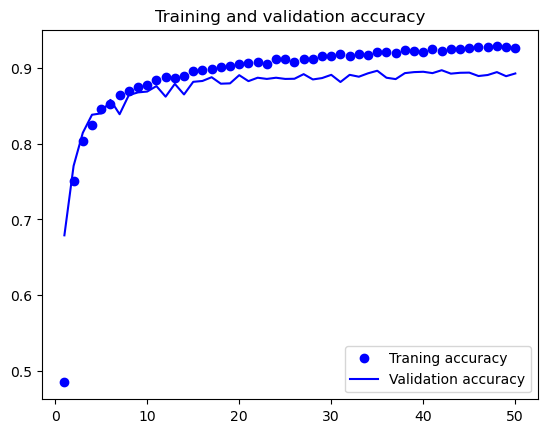

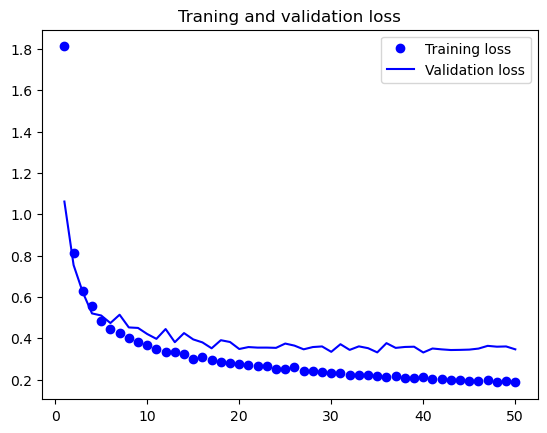

In [31]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(accuracy)+1)
plt.plot(epochs, accuracy, 'bo', label='Traning accuracy')
plt.plot(epochs, val_accuracy,'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Traning and validation loss')
plt.legend()
plt.show()

In [57]:
def create_lenet_model():
    model = models.Sequential([
        layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', 
                      input_shape=(28, 28, 1), padding='same'),
        layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
        layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', 
                      padding='valid'),
        layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
        layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='tanh', 
                      padding='valid'),
        layers.Flatten(),
        layers.Dense(84, activation='tanh'),
        layers.Dense(37, activation='softmax')
    ])
    return model


In [58]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint('best_model.keras', save_best_only=True),
    tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
]

In [60]:
with tf.device('/GPU:0'):
    lenet_model = create_lenet_model()
    lenet_model.compile(
            optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

c:\Users\patel\.conda\envs\Deep-Learning\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [61]:
history = lenet_model.fit(
    train_generator,
    epochs=50,
    validation_data = validation_generator, callbacks=callbacks
)

Epoch 1/50
555/555 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.2999 - loss: 2.5768 - val_accuracy: 0.5529 - val_loss: 1.5846
Epoch 2/50
555/555 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.5958 - loss: 1.4228 - val_accuracy: 0.6932 - val_loss: 1.0509
Epoch 3/50
555/555 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.7221 - loss: 0.9634 - val_accuracy: 0.7547 - val_loss: 0.8215
Epoch 4/50
555/555 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.7752 - loss: 0.7506 - val_accuracy: 0.7820 - val_loss: 0.7165
Epoch 5/50
555/555 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.8027 - loss: 0.6437 - val_accuracy: 0.7890 - val_loss: 0.6836
Epoch 6/50
555/555 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.8163 - loss: 0.5786 - val_accuracy: 0.8182 - val_loss: 0.5990
Epoch 7/50
555/555 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.8355 - loss: 0.5231 - val_accuracy: 0.8264 - val_loss: 0.5751
Epoch 8/50
555/555 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.8357 - loss: 0.5158 - val_acc

In [62]:
test_loss, test_accuracy = lenet_model.evaluate(validation_generator)
print(f'Test Accuracy for Average Pooling: {test_accuracy:.4f}')

139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8577 - loss: 0.4470
Test Accuracy for Average Pooling: 0.8628


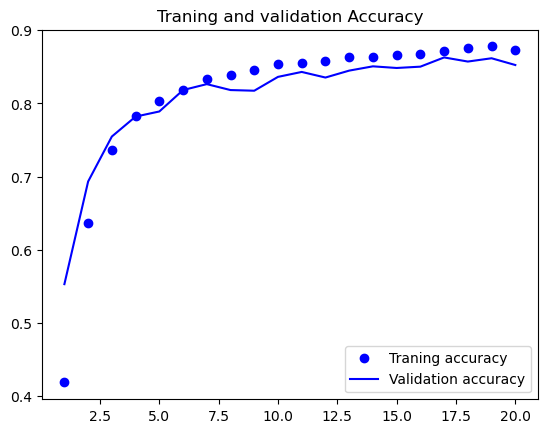

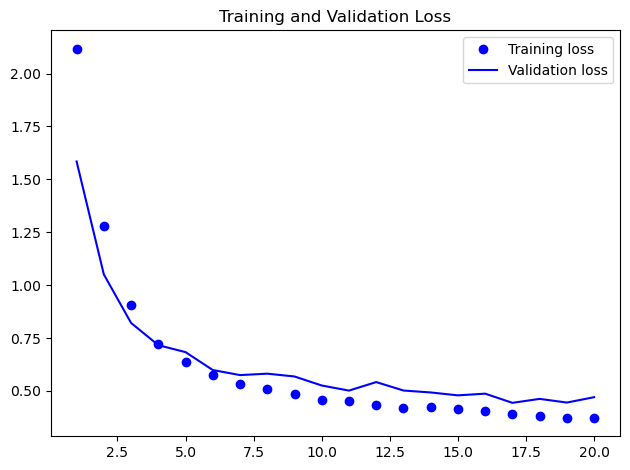

In [63]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(accuracy) + 1)
plt.plot(epochs, accuracy, 'bo', label='Traning accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Traning and validation Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.tight_layout()
plt.show()